Put the data excel file in the same directory of the code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
def calc_mard(y, y_hat):
    return np.mean(np.abs(y - y_hat)/y)

def calc_R2(y, y_hat):
    return np.corrcoef(y, y_hat)[0, 1]**2

In [3]:
data = pd.read_excel('Dataset_muSORS.xlsx', sheet_name='Fig. 2i')

In [4]:
R2 = np.zeros(5)
mard = np.zeros(5)

for i in range(5):
    y_true_pred = data.to_numpy()[:, 6+5*i:8+5*i].astype('float')
    y_true = y_true_pred[:, 0]
    y_pred = y_true_pred[:, 1]
    mard[i] = calc_mard(y_true, y_pred)
    R2[i] = calc_R2(y_true, y_pred)

In [5]:
sns.set_theme()
sns.set_style('white')
sns.set_style('ticks')
color_list = sns.color_palette()

In [6]:
if not os.path.exists('output_figures'):
    os.mkdir('output_figures')

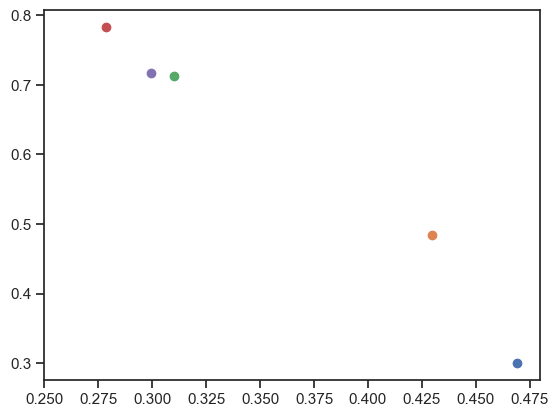

In [7]:
for i in range(5):
    plt.scatter(mard[i], R2[i], color=color_list[i])
plt.xlim([0.25, 0.48])
plt.xticks(np.arange(0.25, 0.5, 0.025));
plt.savefig('output_figures/MARD_R2.pdf')

In [8]:
mard

array([0.46899627, 0.42967309, 0.30985681, 0.27850467, 0.29948844])

In [9]:
R2

array([0.30021257, 0.48439254, 0.7122224 , 0.78287943, 0.71651834])

In [10]:
coef_PLS = pd.read_excel('Dataset_muSORS.xlsx', sheet_name='Fig. 2j')

In [11]:
coef_PLS = coef_PLS.to_numpy()[2:,:]
coef_PLS

array([[400.801217175453, -0.00736180476248863, 0.000559113851096829,
        nan, 400, 13241.0990270018],
       [403.118095327168, 0.000374804631510589, -0.00535797592314426,
        nan, 402, 13916.3371819873],
       [405.433255858927, 0.00447978757785652, 0.00608266603132121, nan,
        404, 14428.6831649959],
       ...,
       [1596.3827124647, -0.00227714169267356, 0.00584274876801274, nan,
        nan, nan],
       [1597.86979059358, 0.00331989226029991, -0.00306292344074248, nan,
        nan, nan],
       [1599.35601065842, 0.00214995919844558, -0.000255199630137832,
        nan, nan, nan]], dtype=object)

In [12]:
wave_glu = coef_PLS[:, 4]
glu = coef_PLS[:, 5]
wave_PLS = coef_PLS[:, 0]
coef0 = coef_PLS[:, 1]
coef3 = coef_PLS[:, 2]

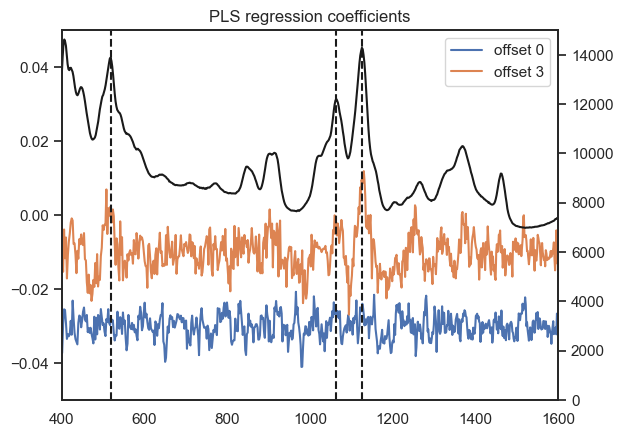

In [13]:
sns.set_theme()
sns.set_style('white')
plt.plot(wave_PLS, coef0-0.03)
plt.plot(wave_PLS, coef3-0.01)
plt.xlim([400, 1600])
plt.title('PLS regression coefficients')
plt.legend(['offset 0', 'offset 3']);
plt.ylim([-0.05, 0.05])
ax2 = plt.gca().twinx()
plt.plot(wave_glu, glu, color='k')
ax2.set_ylim([0, 15000])
y_lim = ax2.get_ylim()
ax2.plot(518*np.ones(2), y_lim, linestyle='--', color='k')
ax2.plot(1064*np.ones(2), y_lim, linestyle='--', color='k')
ax2.plot(1126*np.ones(2), y_lim, linestyle='--', color='k')
ax2.set_ylim(y_lim);
plt.savefig('output_figures/PLS_vector.pdf', bbox_inches='tight')